> # Essential Math for AI 
> # Chapter 2: Data, Data, Data
> # Plotting the uniform distribution
> # Plotting the univariate and bivariate normal (also called Gaussian) distributions
> # Checking whether real Height and Weight data for males and females follow a normal distribution
> # Exploring a mixture of probability distributions: Gaussian mixture
___

# 1. The Uniform Distribution has the following formula for its probability density function:
# $$f(x)=\frac{1}{x_{max}-x_{min}} \text{ for } x_{min}<x<x_{max}$$ and zero otherwise.


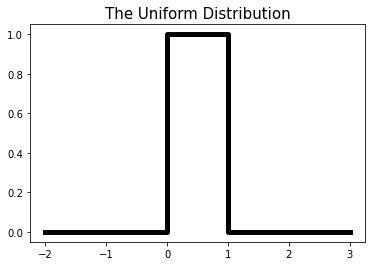

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Uniform Distribution 
x_min=0
x_max=1

x = np.array([x_min-2, x_min+2, x_max-2, x_max+2])
y = np.array([0, 1/(x_max-x_min),1/(x_max-x_min),0])
  
plt.step(x, y, 'k', where='mid',linewidth=5)

plt.title('The Uniform Distribution',fontsize=15)
plt.savefig("Fig_uniform.png")

# 2. The normal (also called Gaussian) distribution has the following formula for its probability density function. It has two parameters, the mean $\mu$ and the standard deviation $\sigma$: $$g(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

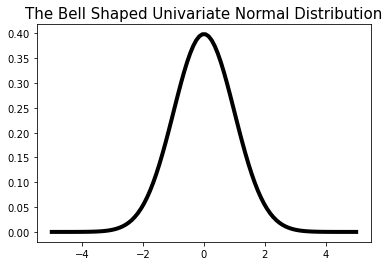

In [3]:
# Univariate Normal Distribution 
mu=0
sigma=1
x=np.linspace(-5,5,100)
y=np.exp(-0.5*(x-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))
# plot the data points
plt.plot(x,y,'k',linewidth=4)
plt.title('The Bell Shaped Univariate Normal Distribution',fontsize=15)
plt.savefig("Fig_standard_normal.png")

# 3. Let's plot the two dimensional bivariate normal (Gaussian) distribution:
The general formula for the two dimensional [bivariate Gaussian distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) is:
$$g(x,y;\mu_1,\mu_2,\sigma_1,\sigma_2)=\frac{1}{\sqrt{(2\pi)^2\det\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}}}e^-\left\{{\frac{1}{2}\begin{pmatrix} x-\mu_1& y-\mu_2\end{pmatrix}\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}^{-1}\begin{pmatrix}x-\mu_1\\y-\mu_2\end{pmatrix}}\right\}$$

This can be compacted into 
$$g(x,y;\mu_1,\mu_2,\sigma_1,\sigma_2)=\frac{1}{\sqrt{(2\pi)^2\det(\Sigma)}}e^-\left\{{\frac{1}{2}(u-\mu)^T\Sigma^{-1}(u-\mu)}\right\}$$

Compare the above formula to the one dimensional normal distribution density function:
$$g(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- When there is only one random variable you only have one mean $\mu$ and one standard deviation $\sigma$.

- When there are two random variables, you have two means $\begin{pmatrix}\mu_1\\\mu_2\end{pmatrix}$, two standard deviations $\begin{pmatrix}\sigma_1\\\sigma_2\end{pmatrix}$, and the product $\sigma^2$ will be replaced by the covariance matrix $\Sigma=\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}$ and its determinant. Here, $\rho$ is the correlation between the two random variables.

The following code plots the bivariate normal distribution.

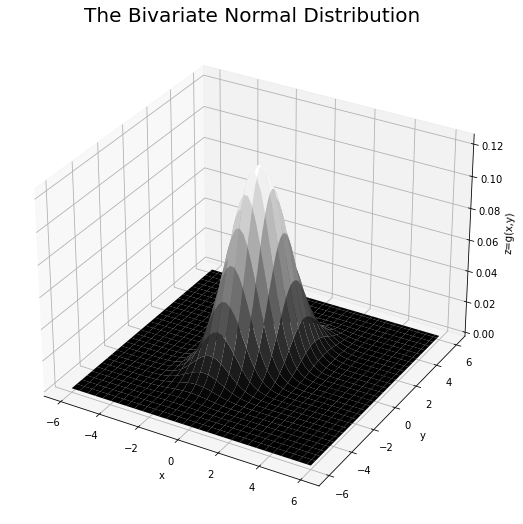

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

# Our 2-dimensional distribution will be over variables X and Y
n = 60 # number of grid points on each axis
X = np.linspace(-6, 6, n)
Y = np.linspace(-6, 6, n)
X, Y = np.meshgrid(X, Y)
# Stack X and Y into a single 3-dimensional array
position = np.empty(X.shape + (2,)) #this gives a tensor of shape (60,60,2)
position[:, :, 0] = X
position[:, :, 1] = Y

# Mean vector and covariance matrix
mu_1=0
mu_2=0
mu = np.array([mu_1, mu_2])
Sigma = np.array([[ 1 , 3/5], [3/5,  2]])

def multivariate_gaussian(position, mu, Sigma):
    
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**2 * Sigma_det) # this is the normalizing constant.
    fac = np.einsum('...k,kl,...l->...', position-mu, Sigma_inv, position-mu) # This einsum or Einstein sum 
    # calculates (u-mu)^T.Sigma^-1.(u-mu) in a vectorized way across all the input variables.

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y stacked into a position tensor.
Z = multivariate_gaussian(position, mu, Sigma)

# Create a surface plot
fig = plt.figure(figsize=(9,9))
picture = plt.axes(projection='3d')
#picture.plot_surface(X, Y, Z, cmap=cm.magma)
picture.plot_surface(X, Y, Z, cmap='gist_gray')
# set labels for axes
picture.set_xlabel('x')
picture.set_ylabel('y')
picture.set_zlabel('z=g(x,y)')
# set image title
picture.set_title('The Bivariate Normal Distribution', fontsize=20) 
# save the figure
plt.savefig("Fig_bivariate_normal.png")

# 4. Now let's sample n points $(x_i,y_i)$ from the bivariate Normal (Gaussian) distribution and use seaborn library to plot the sampled points in the x-y plane. These should look like a noisy shadow in the $x$-$y$ plane of the surface plot of $g(x,y)$ above. Points near the center are more likely to be picked then they dwindle down as we move farther out.

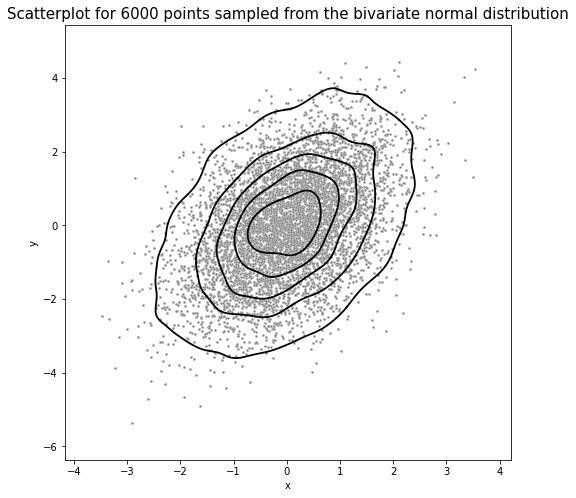

In [5]:
import seaborn as sns

# Simulate data from a bivariate Gaussian
n = 6000
mean = [0, 0]
cov = [(1, 3/5), (3/5, 2)]
x, y = np.random.multivariate_normal(mean, cov, n).T

# Draw a scatterplot with density contours
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=x, y=y, s=7, color="gray")
sns.kdeplot(x=x, y=y, levels=6, color="k", linewidths=1.8)
# set labels for axes
plt.xlabel('x')
plt.ylabel('y')
# set image title
plt.title('Scatterplot for {} points sampled from the bivariate normal distribution'.format(n),fontsize=15)

# save the figure
plt.savefig("Fig_bivariate_normal_sampling.png")

# Let's explore whether [this Height_Weight Kaggle data set](https://www.kaggle.com/mustafaali96/weight-height) fits a normal distribution.

             Height        Weight
count  10000.000000  10000.000000
mean      66.367560    161.440357
std        3.847528     32.108439
min       54.263133     64.700127
25%       63.505620    135.818051
50%       66.318070    161.212928
75%       69.174262    187.169525
max       78.998742    269.989699

   Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


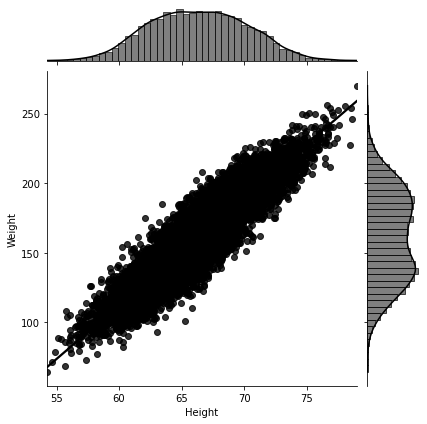

In [6]:
import pandas as pd

df=pd.read_csv('weight-height.csv')

# Data statistics
print(df.describe())

# Data head
print('\n',df.head())

hw_plot=sns.jointplot(data=df, x='Height', y='Weight', kind='reg', color='k')

# Explore the data using histograms and probability density function estimation plots (Kernel Density Estimation plots)

Let's plot separate histograms for the weight and height data (these are already shown at the margins of the above plot), without separating by gender. Let's also explore the KDE plot, which estimates the probability density function of the height and weight data. We notice a double peak for both the weight and height data. This points to a mixed normal distribution. Note that the probability density function integrates to one, meaning that the area under the smooth curve is one (which is not necessarily the case for the histogram plots).

From KDE documentation from the Python seaborn library: A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

# Height Data

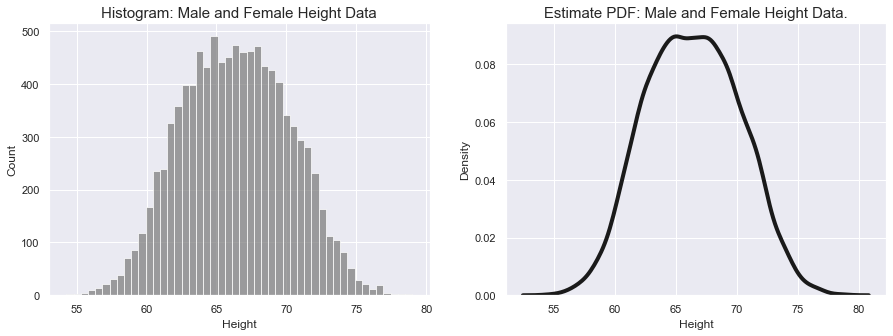

In [7]:
sns.set() # Setting seaborn as default style even if use only matplotlib
fig, subs = plt.subplots(1,2,figsize=(15,5))
height_hist=sns.histplot(df.iloc[:,1], ax=subs[0], color='grey')
subs[0].set_title('Histogram: Male and Female Height Data',fontsize=15)
sns.kdeplot(data=df.iloc[:,1],ax=subs[1],color='k', linewidth=4)
subs[1].set_title('Estimate PDF: Male and Female Height Data.',fontsize=15)

plt.savefig("Fig_male_female_height.png")

# Weight Data

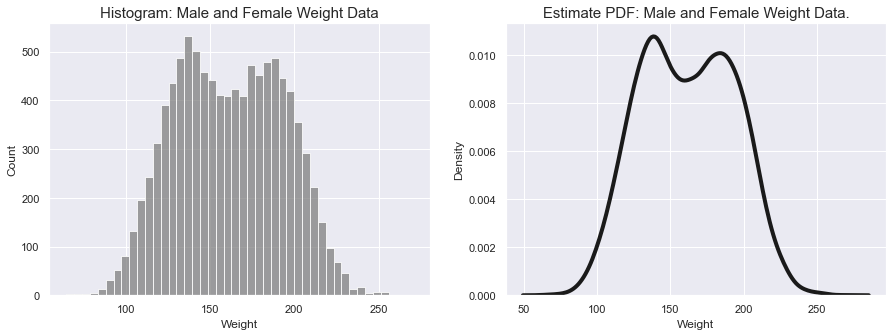

In [21]:
fig, subs = plt.subplots(1,2,figsize=(15,5))
weight_hist=sns.histplot(df.iloc[:,2], ax=subs[0], color='grey')
subs[0].set_title('Histogram: Male and Female Weight Data',fontsize=15)
sns.kdeplot(data=df.iloc[:,2],ax=subs[1],color='k', linewidth=4)
subs[1].set_title('Estimate PDF: Male and Female Weight Data.',fontsize=15)

plt.savefig("Fig_male_female_weight.png")

# Now let's separate the height data by gender and plot the histogram and estimated KDE for each gender separately.

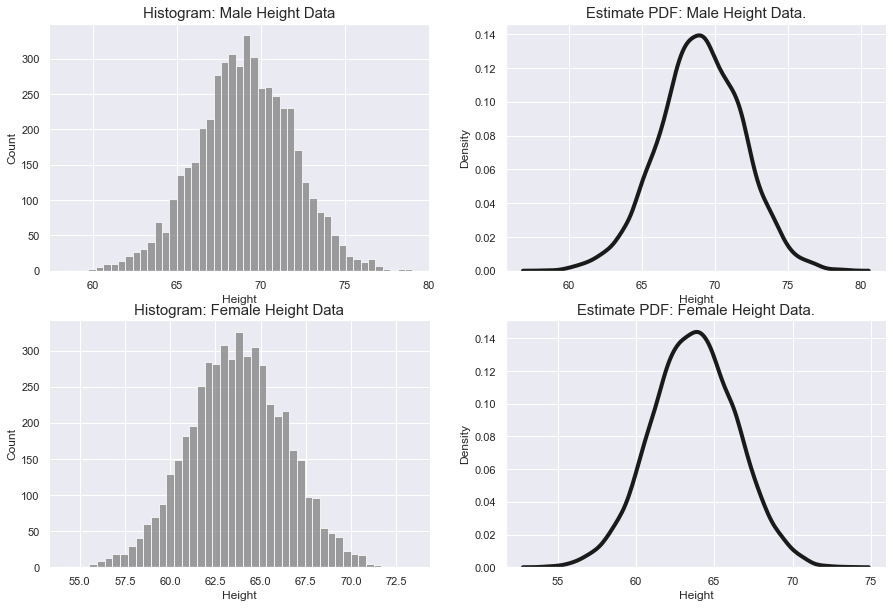

In [22]:
df_M=df[df['Gender']=='Male']
df_F=df[df['Gender']=='Female']

fig, subs = plt.subplots(2,2,figsize=(15,10))
height_hist=sns.histplot(df_M.iloc[:,1], ax=subs[0,0], color='grey')
subs[0,0].set_title('Histogram: Male Height Data',fontsize=15)
sns.kdeplot(data=df_M.iloc[:,1],ax=subs[0,1],color='k', linewidth=4)
subs[0,1].set_title('Estimate PDF: Male Height Data.',fontsize=15)

height_hist=sns.histplot(df_F.iloc[:,1], ax=subs[1,0], color='grey')
subs[1,0].set_title('Histogram: Female Height Data',fontsize=15)
sns.kdeplot(data=df_F.iloc[:,1],ax=subs[1,1],color='k', linewidth=4)
subs[1,1].set_title('Estimate PDF: Female Height Data.',fontsize=15)

plt.savefig("Fig_separate_height.png")

# Let's plot the estimated probability density functions for both the male and female height data on the same graph. Females are on average shorter than males. 

Text(0.5, 1.0, 'Estimate PDFs: Separate Female and Male Height Data')

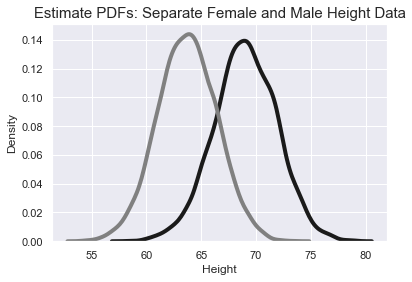

In [10]:
sns.kdeplot(data=df_M.iloc[:,1],color='k', linewidth=4)
sns.kdeplot(data=df_F.iloc[:,1],color='grey', linewidth=4)
plt.title('''Estimate PDFs: Separate Female and Male Height Data''', fontsize=15)

# Let's do the same for the weight data. Separate the weight data by gender and plot the histogram and an estimated KDE for each gender separately.

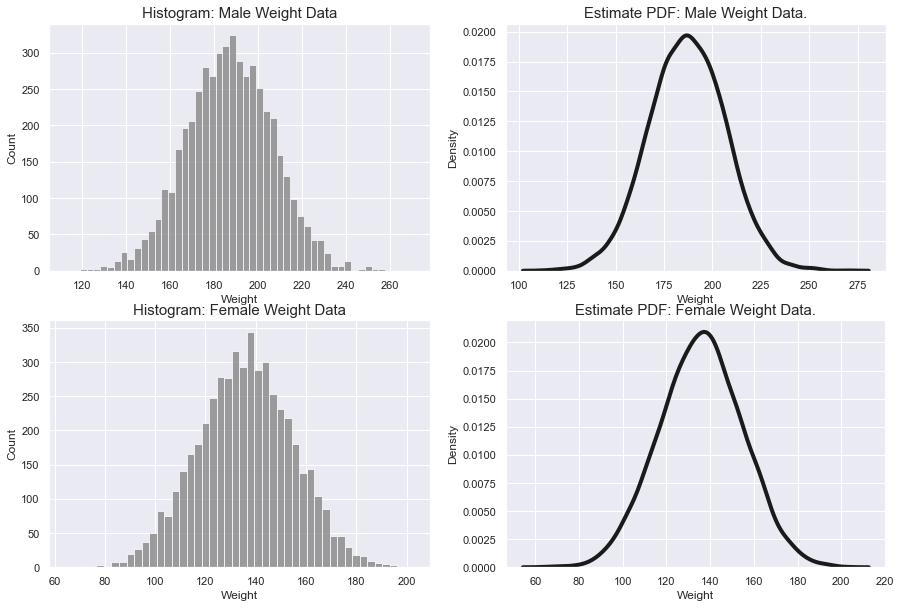

In [23]:
fig, subs = plt.subplots(2,2,figsize=(15,10))
weight_hist=sns.histplot(df_M.iloc[:,2], ax=subs[0,0], color='grey')
subs[0,0].set_title('Histogram: Male Weight Data',fontsize=15)
sns.kdeplot(data=df_M.iloc[:,2],ax=subs[0,1],color='k', linewidth=4)
subs[0,1].set_title('Estimate PDF: Male Weight Data.',fontsize=15)

weight_hist=sns.histplot(df_F.iloc[:,2], ax=subs[1,0], color='grey')
subs[1,0].set_title('Histogram: Female Weight Data',fontsize=15)
sns.kdeplot(data=df_F.iloc[:,2],ax=subs[1,1],color='k', linewidth=4)
subs[1,1].set_title('Estimate PDF: Female Weight Data.',fontsize=15)

plt.savefig("Fig_separate_weight.png")

# Let's plot the estimated probability density functions for both the male and female weight data on the same graph. Females are on average lighter than males. 

Text(0.5, 1.0, 'Estimate PDFs: Separate Female and Male Weight Data')

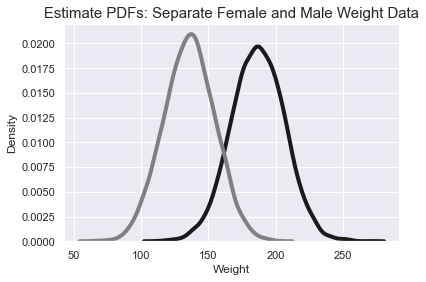

In [12]:
sns.kdeplot(data=df_M.iloc[:,2],color='k', linewidth=4)
sns.kdeplot(data=df_F.iloc[:,2],color='grey', linewidth=4)
plt.title('''Estimate PDFs: Separate Female and Male Weight Data''', fontsize=15)

# Let's explore the statistics for the real data using the .describe method from pandas. We want to know whether this real data can be estimated using a normal distribution. We will compare the estimated probability density function to a normal distribution with the same mean and variance as the observed mean and variance of the real data.

In [13]:
print('\n Male Height and Weight data description \n',df_M.describe())
print('\n Female Height and Weight data description \n',df_F.describe())


 Male Height and Weight data description 
             Height       Weight
count  5000.000000  5000.000000
mean     69.026346   187.020621
std       2.863362    19.781155
min      58.406905   112.902939
25%      67.174679   173.887767
50%      69.027709   187.033546
75%      70.988744   200.357802
max      78.998742   269.989699

 Female Height and Weight data description 
             Height       Weight
count  5000.000000  5000.000000
mean     63.708774   135.860093
std       2.696284    19.022468
min      54.263133    64.700127
25%      61.894441   122.934096
50%      63.730924   136.117583
75%      65.563565   148.810926
max      73.389586   202.237214


Text(0.5, 1.0, 'Normal Distribution With Same Mean and Variance\n as the Male Height Data Matching the Estimated PDF')

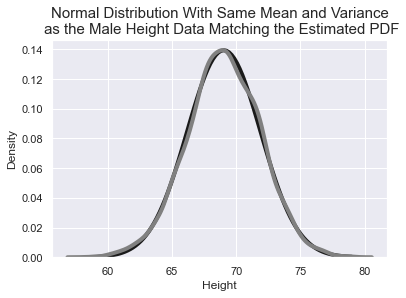

In [14]:
describe_m=df_M.describe()
describe_f=df_F.describe()

# Let plot normal distributions with mean and standard deviation equal to the ones we have
mean_m=describe_m.loc['mean']
std_m=describe_m.loc['std']
min_m=describe_m.loc['min']
max_m=describe_m.loc['max']
mean_f=describe_f.loc['mean']
std_f=describe_f.loc['std']
min_f=describe_f.loc['min']
max_f=describe_f.loc['max']

# Male Height Data
mu=mean_m[0]
sigma=std_m[0]
minn=min_m[0]
maxx=max_m[0]
x=np.linspace(minn,maxx,100)
y=np.exp(-0.5*(x-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))
plt.plot(x,y,'k',linewidth=4)
sns.kdeplot(data=df_M.iloc[:,1],color='grey', linewidth=4)
plt.title('Normal Distribution With Same Mean and Variance\n as the Male Height Data Matching the Estimated PDF',fontsize=15)

Text(0.5, 1.0, 'Normal Distribution With Same Mean and Variance\n as the Male Weight Data Matching the Estimated PDF')

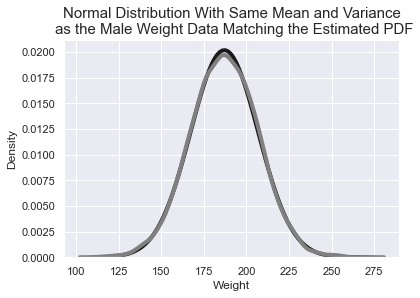

In [15]:
# Male Weight Data
mu=mean_m[1]
sigma=std_m[1]
minn=min_m[1]
maxx=max_m[1]
x=np.linspace(minn,maxx,100)
y=np.exp(-0.5*(x-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))
plt.plot(x,y,'k',linewidth=4)
sns.kdeplot(data=df_M.iloc[:,2],color='grey', linewidth=4)
plt.title('Normal Distribution With Same Mean and Variance\n as the Male Weight Data Matching the Estimated PDF',fontsize=15)

Text(0.5, 1.0, 'Normal Distribution With Same Mean and Variance\n as the Female Height Data Matching the Estimated PDF')

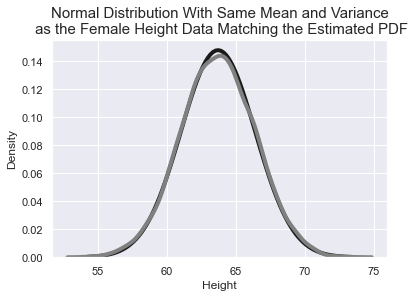

In [16]:
# Female Height Data
mu=mean_f[0]
sigma=std_f[0]
minn=min_f[0]
maxx=max_f[0]
x=np.linspace(minn,maxx,100)
y=np.exp(-0.5*(x-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))
plt.plot(x,y,'k',linewidth=4)
sns.kdeplot(data=df_F.iloc[:,1],color='grey', linewidth=4)
plt.title('Normal Distribution With Same Mean and Variance\n as the Female Height Data Matching the Estimated PDF',fontsize=15)

Text(0.5, 1.0, 'Normal Distribution With Same Mean and Variance\n as the Female Weight Data Matching the Estimated PDF')

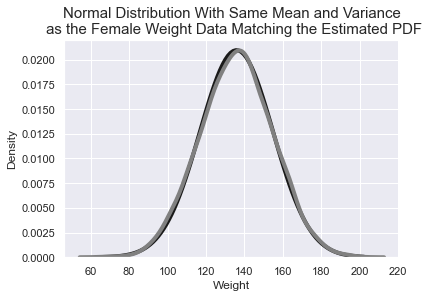

In [17]:
# Female Weight Data
mu=mean_f[1]
sigma=std_f[1]
minn=min_f[1]
maxx=max_f[1]
x=np.linspace(minn,maxx,100)
y=np.exp(-0.5*(x-mu)**2/sigma**2)/(sigma*np.sqrt(2*np.pi))
plt.plot(x,y,'k',linewidth=4)
sns.kdeplot(data=df_F.iloc[:,2],color='grey', linewidth=4)
plt.title('Normal Distribution With Same Mean and Variance\n as the Female Weight Data Matching the Estimated PDF',fontsize=15)

# There are statistical tests that check whether real data is normally distributed. A Quantile-Quantile (called QQ plot) plot is a visual test. 

If the observed data lies on the straightline y=x then the data belongs to the same distribution as the distributions whose quantiles are on the x-axis. We contruct the qq-plot for the male height data against the normal distribution. The straight line pattern allows us to believe that the male height data can be safely modeled using the normal distribution. The same can be done for the male height data and the female height and weight data. 

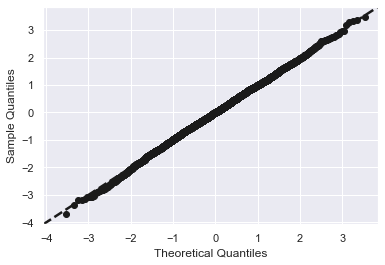

In [18]:
import statsmodels.api as sm
# normalize the male height data by subtracting its mean and dividing by its standard deviation
data_m_h=(df_M.iloc[:,1]-mean_m[0])/std_m[0]

# Plot the male height data quantiles against the standard normal distribution quantiles
fig=sm.qqplot(data_m_h, markerfacecolor='k', markeredgecolor='k',markersize=6)

# format the line
sm.qqline(fig.axes[0], line='45', fmt='k--',linewidth=2.5)

# Gaussian Mixtures

Now that we have convinced ourselves that the male and female height and weight data can each be modeled using normal distributions, we can see that it is reasonable to model the combined male and female height data (or weight data) using a Gaussian mixture, meaning a mix of two normal distributions. Mixture distributions usually represent populations that have subpopulation components, such as the male and female subpopulations. Notice that in both the height and weight cases, the mixture distributions are _bimodal_ (they have two peaks). 

# Male and Female Height Data: Bimodal Gaussian Mixture

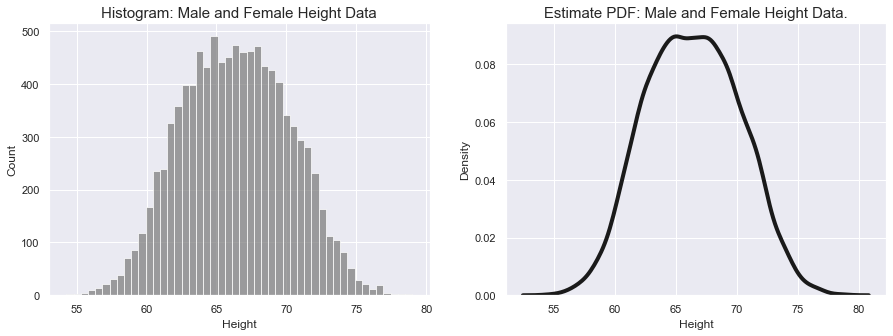

In [25]:
fig, subs = plt.subplots(1,2,figsize=(15,5))
height_hist=sns.histplot(df.iloc[:,1], ax=subs[0], color='grey')
subs[0].set_title('Histogram: Male and Female Height Data',fontsize=15)
sns.kdeplot(data=df.iloc[:,1],ax=subs[1],color='k', linewidth=4)
subs[1].set_title('Estimate PDF: Male and Female Height Data.',fontsize=15)

plt.savefig("Fig_Gaussian_mix_height.png")

# Male and Female Weight Data: Bimodal Gaussian Mixture

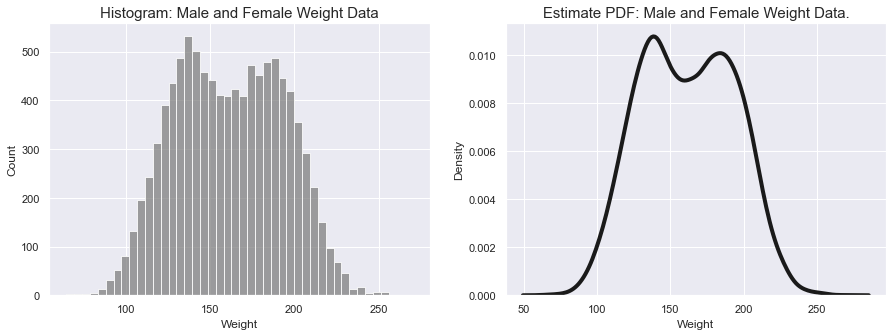

In [24]:
fig, subs = plt.subplots(1,2,figsize=(15,5))
weight_hist=sns.histplot(df.iloc[:,2], ax=subs[0], color='grey')
subs[0].set_title('Histogram: Male and Female Weight Data',fontsize=15)
sns.kdeplot(data=df.iloc[:,2],ax=subs[1],color='k', linewidth=4)
subs[1].set_title('Estimate PDF: Male and Female Weight Data.',fontsize=15)

plt.savefig("Fig_Gaussian_mix_weight.png")

# Formulas for the Gaussian Mixture Distributions Modeling the Height and Weight Data

Let the probability density function for the female height data be $g(h;\mu_f,\sigma_f)$, and the probability density function for the male height data be $g(h;\mu_m,\sigma_m)$, then the probability density function for the mixture is the linear combination:

$$g(h;\mu_f,\sigma_f,\mu_m,\sigma_m)=\alpha_1g(h;\mu_f,\sigma_f)+\alpha_2g(h;\mu_m,\sigma_m)$$ 

where $\alpha_1$ and $\alpha_2$ are nonnegative numbers that add up to 1. We usually estimate these $\alpha$'s from the data. This will be discussed in later chapters.

Let the probability density function for the female weight data be $g(w;\mu_f,\sigma_f)$, and the probability density function for the male weight data be $g(w;\mu_m,\sigma_m)$, then the probability density function for the mixture is the linear combination:

$$g(w;\mu_f,\sigma_f,\mu_m,\sigma_m)=\beta_1g(w;\mu_f,\sigma_f)+\beta_2g(w;\mu_m,\sigma_m)$$ 

where $\beta_1$ and $\beta_2$ are nonnegative numbers that add up to 1. We estimate these $\alpha$'s from the data. 

# Mixtures of Probability Distributions in Machine Learning

In machine learning, mixtures of probability distributions such as the above Gaussian mixtures for height and weight data are used for tasks that involve _clustering_ unlabeled data points. A data point is then labeled as _most likely_ to have come from a certain component of the mixture, hence the term _maximum likelihood_. 

You might have also heard of k-means clustering to cluster unlabeled data points. The difference between k_means clustering and mixture models for clustering is that k-means assigns one cluster to each data point, and a mixture model assigns each data point a list of probabilities of belonging to each cluster. Mixture models in machine learning are often accompanied by an algorithm called _Expectation Maximization_ or EM algorithm, which is different than _Gradient Descent_, since gradient descent has a derivative step and we cannot compute derivative of the random variables that are involved in mixture models. We will explain this in detail in later chapters.

# Joint probability distribution, posterior probability, and maximum likelihood

Let's slice a joint probability distribution (continuous density function) $f(variables;\omega)$ and get a distribution proportional to a conditional probability density function. Here we have two random variables (each can be high dimensional), one representing the features of the data (x), and the other representing the parameters of a probabilistic model ($\omega$). 

Usually we are interested in the posterior probability: 

$$f_{\omega|observations}(\omega|observations)=\frac{1}{f_{observations}(observations)}f_{(observations;\omega)}(observations;\omega)$$

or

$$f_{\omega|x}(\omega|x=a)=\frac{1}{f_x(x=a)}f_{(x;\omega)}(x;\omega)$$

We do not know the denominator but we are only interested in those $\omega$'s that maximize the likelihood, so we look for the $\omega$'s in the slice in the joint probability distribution that correspond to the peak. All of this depends on us having access to the joint probability distribution or to an approximation of it.

Consider for example the joint density function to be the bivariate Gaussian, and we care for 

$$f(\omega|x=a)=\frac{1}{f(x=a)}f(x=a;\omega)$$

So we must draw the plane x=a, slicing through the joint ddensity function. We get the curve for  
$$f(x=a;\omega)=f(\omega|x=a)f(x=a)$$

In practice, we need to fix the the $\omega$ that maximizes $f(\omega|x=a)$, but that would be the same $\omega$ that maximizes $f(x=a;\omega)$, or the $\omega$ corresponding to the highest point on the curve. This is the parameter for the probabilistic model that maximizes the likelihood of the data! 

The graph shows the bivariate normal joint probability density function for random variables x and $\omega$. To see the distribution of $\omega$ conditional on x=a one can first visualize the plane x=a slicing through the bivariate normal joint density. The curve of the intersection of that plane with the joint normal density, once rescaled to give unit area under the intersection, is the relevant conditional density $f(\omega|x=a)$.

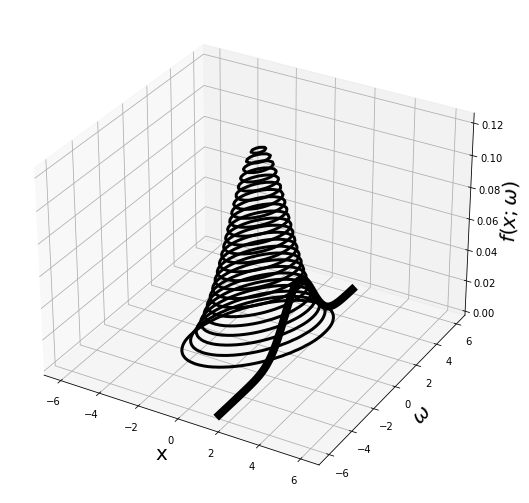

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

# Our 2-dimensional distribution will be over variables X and Y
n = 60 # number of grid points on each axis
x = np.linspace(-6, 6, n)
y = np.linspace(-6, 6, n)
X, Y = np.meshgrid(x, y)
# Stack X and Y into a single 3-dimensional array
position = np.empty(X.shape + (2,)) #this gives a tensor of shape (n,n,2)
position[:, :, 0] = X
position[:, :, 1] = Y

# Mean vector and covariance matrix
mu_1=0
mu_2=0
mu = np.array([mu_1, mu_2])
Sigma = np.array([[ 1 , 3/5], [3/5,  2]])

def multivariate_gaussian(position, mu, Sigma):
    
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**2 * Sigma_det) # this is the normalizing constant.
    fac = np.einsum('...k,kl,...l->...', position-mu, Sigma_inv, position-mu) # This einsum or Einstein sum 
    # calculates (u-mu)^T.Sigma^-1.(u-mu) in a vectorized way across all the input variables.

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y stacked into a position tensor.
Z = multivariate_gaussian(position, mu, Sigma)

# Create a surface plot
fig = plt.figure(figsize=(9,9))
picture = plt.axes(projection='3d')
#picture.plot_surface(X, Y, Z, cmap=cm.magma)
#picture.plot_surface(X, Y, Z, cmap='Greys')
picture.contour3D(X, Y, Z,28,cmap=None,colors='black',linewidths=3)
# set labels for axes
picture.set_xlabel('x', fontsize=20)
picture.set_ylabel('$\omega$', fontsize=20)
picture.set_zlabel('$f(x;\omega)$', fontsize=20)
# set image title
#picture.set_title('The Bivariate Normal Distribution', fontsize=20) 

# Slice through the joint distribution
#x1=[1.5]*n
x1=X[:,37]
y1 = np.linspace(-6, 6, n)
z1=Z[:,37]
plt.plot(x1,y1,z1,'k',linewidth=8)

# save the figure
plt.savefig("Fig_slice_joint.png")


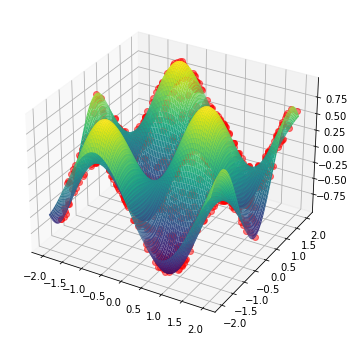

In [50]:
# example from stack overflow about plotting over a surface plot

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):                        
    return np.sin(2*x) * np.cos(2*y)

# data for the surface
x = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, x)
Z = f(X, Y)

# data for the scatter
xx = 4*np.random.rand(1000) - 2
yy = 4*np.random.rand(1000) - 2
zz = f(xx,yy)

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
#ax.scatter(xx, yy, zz, c='r', marker='o')
ax.plot(xx, yy, zz, 'ro', alpha=0.5) # note the 'ro' (no '-') and the alpha

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')